In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize'] = 10, 12
import warnings
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
intel = pd.read_csv('inteldata.csv')
intel = intel.drop(['Unnamed: 0'], axis=1)
intel.fillna(0, inplace=True)

intel

,sdate,stime,epoch,moteid,temp,humidity,light,voltage
0,2004-03-31,03:38:15.757551,2,1.0,122.1530,-3.91901,11.04,2.03397
1,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.09330,45.08,2.69964
2,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.46290,45.08,2.68742
3,2004-02-28,01:06:16.013453,17,1.0,19.1652,38.80390,45.08,2.68742
4,2004-02-28,01:06:46.778088,18,1.0,19.1750,38.83790,45.08,2.69964
...,...,...,...,...,...,...,...,...
2313677,2004-04-02,01:14:54.164318,61274,0.0,0.0000,0.00000,0.00,0.00000
2313678,2004-04-02,01:17:53.670524,61275,0.0,0.0000,0.00000,0.00,0.00000
2313679,2004-04-02,01:20:52.807972,61276,0.0,0.0000,0.00000,0.00,0.00000
2313680,2004-04-02,01:26:53.950342,61278,0.0,0.0000,0.00000,0.00,0.00000


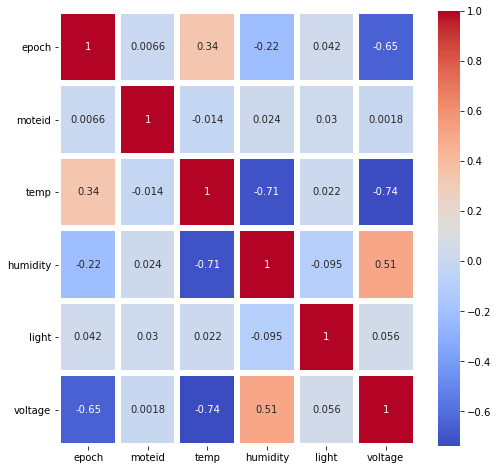

In [3]:
sns.heatmap(intel.corr(),annot=True,cmap='coolwarm',linewidth=5)
fig=plt.gcf() #method to make heatmap
fig.set_size_inches(8,8)

Text(0.5, 1.0, 'Voltage')

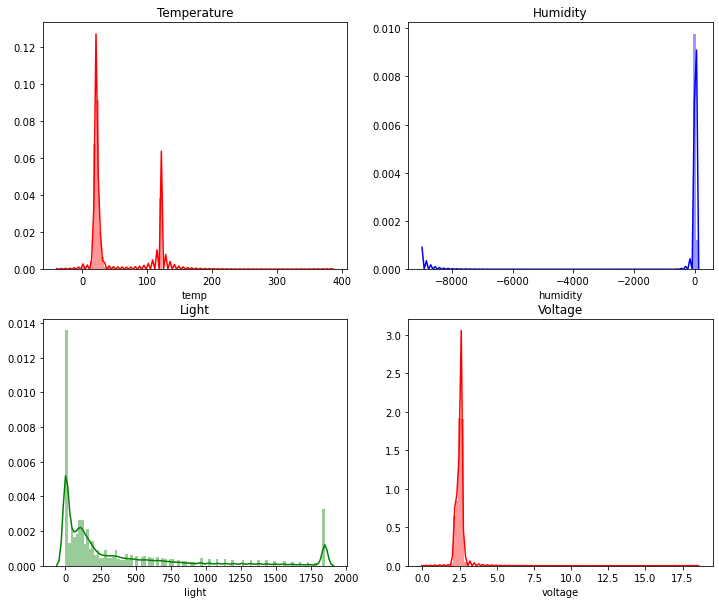

In [4]:
plt.figure(figsize=(12,10))
plt.subplot(221) #2 is row, 2 is column and 1 is position
sns.distplot(intel['temp'], color='r', bins=100, hist_kws={'alpha': 0.4})
plt.title('Temperature')

plt.subplot(222) #2 is row, 2 is column and 1 is position
sns.distplot(intel['humidity'], color='b', bins=100, hist_kws={'alpha': 0.4})
plt.title('Humidity')

plt.subplot(223) #2 is row, 2 is column and 1 is position
sns.distplot(intel['light'], color='g', bins=100, hist_kws={'alpha': 0.4})
plt.title('Light')

plt.subplot(224) #2 is row, 2 is column and 1 is position
sns.distplot(intel['voltage'], color='r', bins=100, hist_kws={'alpha': 0.4})
plt.title('Voltage')

Text(0.5, 0, 'Sensor ID')

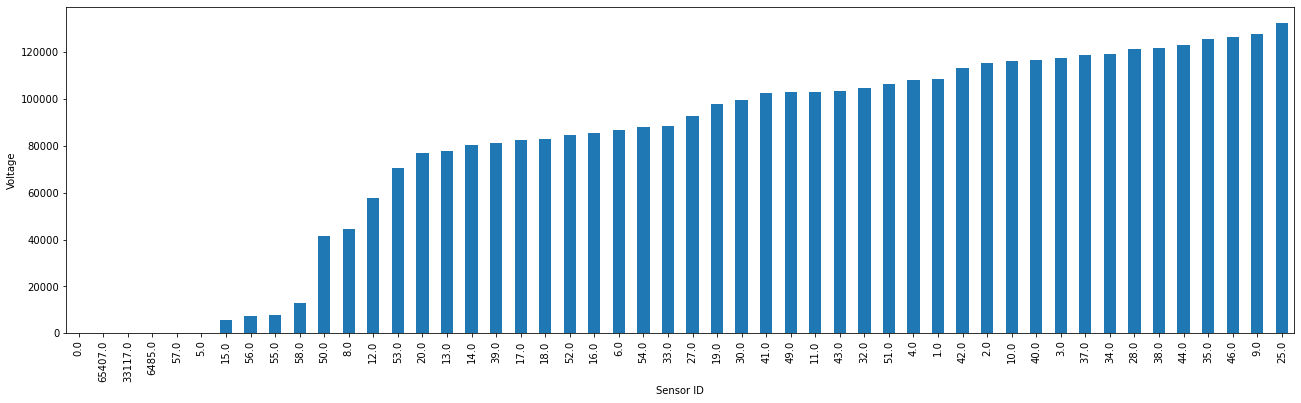

In [5]:
plt.figure(figsize=(22,6))
GraphData=intel.groupby(['moteid'])['voltage'].sum().nsmallest(50)


GraphData.plot(kind='bar')
plt.ylabel('Voltage')
plt.xlabel('Sensor ID')

In [ ]:
sns.jointplot(intel['temp'],intel['voltage'],kind='kde')